2875
6752
720


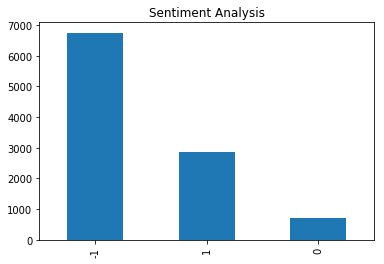

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\mayis_2020.csv') 
data.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")

print((data['Sentiment_Analysis'].values == 1).sum())
print((data['Sentiment_Analysis'].values == -1).sum())
print((data['Sentiment_Analysis'].values == 0).sum())

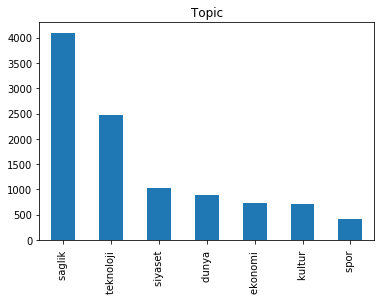

In [37]:
data.Topic.value_counts().plot(kind='bar',title="Topic")

In [1]:
### SVM 

import pandas as pd



data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\mayis_2020.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.25,random_state=0)

from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
result=svc.predict(x_test)

from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,result)
print(cm)

from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,result)
print(accuracy)

print(classification_report(y_test,result))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[1657    3   14]
 [ 152   46   16]
 [ 427    1  271]]
0.7630459992269037
              precision    recall  f1-score   support

          -1       0.74      0.99      0.85      1674
           0       0.92      0.21      0.35       214
           1       0.90      0.39      0.54       699

    accuracy                           0.76      2587
   macro avg       0.85      0.53      0.58      2587
weighted avg       0.80      0.76      0.72      2587



In [11]:
###naive_bayes

import pandas as pd

data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\mayis_2020.csv') 

species=data[["Sentiment_Analysis"]].values

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str)).toarray()

a=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a,species,test_size=0.25,random_state=0)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train, y_train.ravel())

result=gnb.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,result)
print(cm)

from sklearn.metrics import accuracy_score,classification_report
accuarcy=accuracy_score(y_test,result)
print(accuarcy)

print(classification_report(y_test,result))

[[1622  241  347]
 [ 142   75   54]
 [ 336  153  445]]
0.6272327964860908
              precision    recall  f1-score   support

          -1       0.77      0.73      0.75      2210
           0       0.16      0.28      0.20       271
           1       0.53      0.48      0.50       934

    accuracy                           0.63      3415
   macro avg       0.49      0.50      0.49      3415
weighted avg       0.66      0.63      0.64      3415



In [42]:
###  random forest

import pandas as pd

data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\mayis_2020.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.25,random_state=0)

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

predictions = text_classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1621    5   48]
 [ 134   55   25]
 [ 328    7  364]]
              precision    recall  f1-score   support

          -1       0.78      0.97      0.86      1674
           0       0.82      0.26      0.39       214
           1       0.83      0.52      0.64       699

    accuracy                           0.79      2587
   macro avg       0.81      0.58      0.63      2587
weighted avg       0.80      0.79      0.76      2587

0.7885581754928489


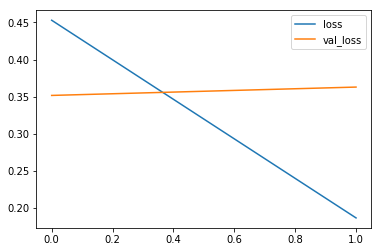

65/65 - 1s
              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      1331
    positive       0.77      0.74      0.75       595

    accuracy                           0.85      1926
   macro avg       0.83      0.82      0.82      1926
weighted avg       0.85      0.85      0.85      1926



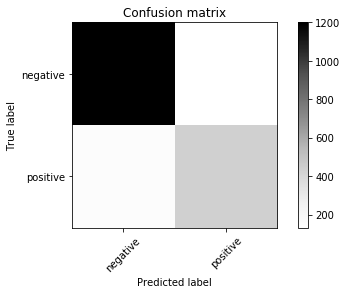

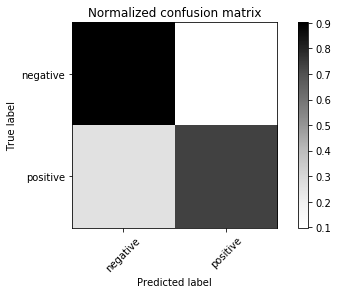

In [9]:
#LSTM https://www.kaggle.com/monsterspy/conv-lstm-sentiment-analysis-keras-acc-0-96

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv(r'C:\Users\MONSTER\Desktop\3.1dönem\makina öğrenmesi proje\mayis_2020.csv') 

data=data[data.Sentiment_Analysis !=0]
print(data.Sentiment_Analysis.value_counts())

#Embedding
max_features=20000
maxlen=100
embedding_size=128

#Convolution
kernel_size=5
filters=64
pool_size=4

lstm_output_size=70

batch_size=30
epochs=2

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
    

tokenizer=Tokenizer(nb_words=max_features,split=' ')
tokenizer.fit_on_texts(data['Description'].values)
X=tokenizer.texts_to_sequences(data['Description'].values)
X=pad_sequences(X, maxlen = maxlen)

Y=pd.get_dummies(data['Sentiment_Analysis']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)




class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()




model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test),callbacks=[plot_losses],verbose = 0)

yhat = model.predict(X_test, verbose = 2, batch_size = batch_size)

from sklearn import metrics
print(metrics.classification_report(Y_test[:,1], np.round(yhat[:,1]) ,target_names = ["negative", "positive"]))








import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

score = ['negative', 'positive']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(score)))
    plt.xticks(tick_marks, score, rotation=45)
    plt.yticks(tick_marks, score)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(Y_test[:,1], np.round(yhat[:,1]))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
